# DB SCAN - Reverse pedagogy
Giuliano RICCARDI - Victor ROBIC

GitHub Repo: https://github.com/victorrbc/tp_dbscan/tree/main

## 1. Intro
**DBSCAN** stands for "**Density-Based Spatial Clustering of Applications with Noise**". It is a clustering algorithm that identifies clusters by taking into account the density of the data points in space. This allows for a more flexible clustering that perfoms better than other algorithms when dealing with nested data. Furthermore, DBSCAN also handles exceptionally well outliers and noise in data since it only affects a point to a cluster if it is within a dense region. 

Just like K-Means algorithm, DBSCAN uses a distance metric in its execution. Because of this, it is **essential** for us to work with **scaled data** so all the features studied are treated as equally important. Also, this algorithm eliminates the need of specifying before hand the amount of clusters we want, DBSCAN **automatically detects** the optimum amount of clusters for its given parameters.

DBSCAN can still perform well identifying clusters and outliers when working with multiple dimensions, making it an even more appealing solution for multidimensional problems.

<u>A little bit of history</u>: DBSCAN algorithm was created in 1996 by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiawei Xu. 

**Clustering**: a technique in unsupervised machine learning that involves grouping a set of observations in such a way that oservations in the same group (cluster) are more similar to each other than to those in other groups. The goal being to discover natural groupings within the studied data.

**Nested data**: said of data when clusters are wrap around one another.

Example:

![Nested Data](./img/3.png)



## 2. Theory

To better understand how the DBSCAN algorithm works, let us start with the definitions of the important notions linked to it.

**Epsilon**: the radius of the neighboorhood around a point. It defines the maximum distance (usually Euclidean distance) at which a point will be considered the neighboor to another one.

**MinPts**: the minimum amount of points needed to form a dense region.

**Dense Region**: a region containing at least MinPts within it.

**Sparse Region**: said of a region that contains points but not enough to be considered a Dense Region.

**Core Point**: said of a data point if there is at least a minimum number of points (MinPts) within a radius Epsilon around it.   

**Border Point**: said of a data point if the point is not a Core Point but lies within a radius Epsilon of a Core Point. 

**Noise Point**: said of a data point if it is neither a Core nor a Border Point. They are considered the outliers and do not belong to any cluster.

![Different Kind of Points](./img/4.png)

## 3. Algorithm Steps

1. Select a point randomly
2. Retrieve all points within an **Epsilon** distance of this point
3. If the point is a **Core Point**, a cluster is formed. If it isn't a Core Point it is labeled as **Noise**
4. Iterate through the cluster adding any point within Epsilon distance of a Core Point to the cluster
5. **Repeat** until all points have been processed

Video Explanation by : **StatQuest with Josh Starmer**

![Gif Illustration for DBSCAN](./img/5.gif)

Full video at: https://www.youtube.com/watch?v=RDZUdRSDOok

Notes: 

We can say that Core Points **extend** the clusters since we will assign every point within Epsilon distance of it to the cluster it belongs to, whereas the Border Points can only be **assigned** to clusters.

Cluster creation is done in **sequence**, this means that if a border point is within Epsilon distance of a Core Point from cluster 1 and a Core Point from cluster 2, it will be assigned to the cluster that the algorithm **first** iterated through.

## 4. Lab

For this lab, we are going to compare the effectiveness and clustering of DBSCAN algorithm and KMeans algorithm. We will be working with images for this lab.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import image
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

### 1. Data Pre Processing:

Loading the image

In [55]:
# Choose between "butterfly.jpeg" or "bateau.jpeg"
image_path = "img/butterfly.jpeg"
save_path = "img/butterfly_resized.jpeg"
img = Image.open(image_path)

Resizing our image to work with less pixels

In [56]:
height = int(img.height/2)
width = int(img.width/2)

In [57]:
img.resize((width,height)).save(save_path)

Since we are working with data that is on the same scale (RGB values for pixels), we don't need to normalize the data. However, it is best practice to do so since it helps to optimize the computing time. Let's normalize the data by dividing it by 255.

In [59]:
I = image.imread(save_path) / 255

### 2. K-Means clustering

Let us visualize the image we will be working with and its shape

(1024, 1536, 3)


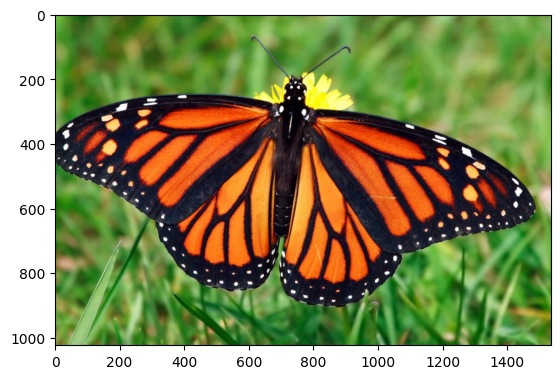

In [60]:
print(I.shape)
plt.imshow(I)

Now, before feeding our data in a model, we must make sure that it is formatted in such a way that we can apply the fit method from sk-learn library. At the current time we have 3D matrix as seen above of shape (height/2, width/2, 3). The third dimension coresponds to the RGB values of each pixel. 

The data that we want to fit in our model should be 2D. To achieve that, we will reshape the matrix in order to obtain a 2D matrix of shape (height*width, 3). This will make it so all our pixels are represented as observations and their rgb value is kept as a feature.

In [8]:
data = I.astype('float32')
data_2D = data.reshape(height*width, 3)
print(data_2D.shape)
data_2D[0:5]

(1572864, 3)


array([[0.44313726, 0.7647059 , 0.2627451 ],
       [0.44313726, 0.7647059 , 0.2627451 ],
       [0.4392157 , 0.7607843 , 0.25882354],
       [0.43529412, 0.75686276, 0.25490198],
       [0.4392157 , 0.75686276, 0.25490198]], dtype=float32)

Let us now define our model and fit the data to it so we can obtain the clusters.

In [9]:
km = KMeans(
    n_clusters = 3, # Change this value to obtain a better precision
    random_state = 20201033
)

km.fit(data_2D)

KMeans(n_clusters=3, random_state=20201033)

In [10]:
clusters = km.predict(data_2D)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

To be able to visualize our clusters within the image we will create a new segmentation matrix that will contain as values the color of each cluster.

In [12]:
km.cluster_centers_[clusters]

array([[0.4185158 , 0.59816545, 0.25623086],
       [0.4185158 , 0.59816545, 0.25623086],
       [0.4185158 , 0.59816545, 0.25623086],
       ...,
       [0.4185158 , 0.59816545, 0.25623086],
       [0.4185158 , 0.59816545, 0.25623086],
       [0.4185158 , 0.59816545, 0.25623086]], dtype=float32)

In [11]:
Xsegmentation = np.empty_like(data_2D)
for i in range(data_2D.shape[0]):
    Xsegmentation[i] = km.cluster_centers_[clusters[i]]

When plotting it is important to reshape the segmentation matrix back to the original image shape so we can visualize it.

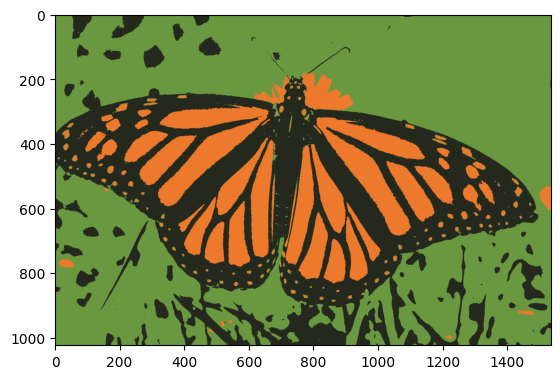

In [26]:
# Run this line if you didn't normalize the data
#plt.imshow(np.uint8(Xsegmentation.reshape(height2, width2, 3)))

plt.imshow(Xsegmentation.reshape(height, width, 3))



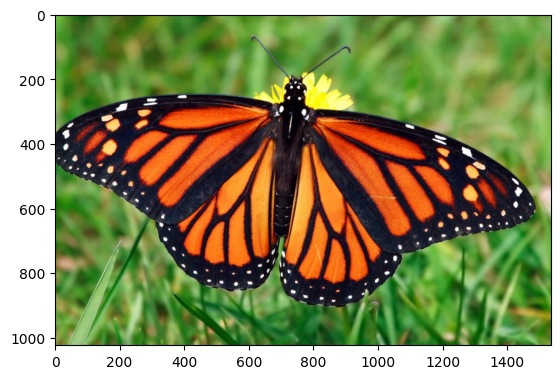

In [27]:
plt.imshow(I)

We can see that interestingly enough, the KMeans algorithm performs well with the image and can detect the clusters as we would. We can finely distinguish the butterfly shape. Let us now delve into DBSCAN.

### 3. DBSCAN

Let us create the model with its hyperparameters as seen in the course.

In [30]:
dbscan = DBSCAN(
    eps = 0.000001, # In our course this is equivalent to Epsilon
    min_samples = 5, # In our course this is equivalent to MinPts
)
dbscan.fit(data_2D)


DBSCAN(eps=1e-06)

In [50]:
print("The number of Core Points found: ",len(dbscan.components_))
print("\nThe Core Points found: ", dbscan.components_)
print("\nThe labels of each Point: ", dbscan.labels_)
print("\nThe number of the clusters found: ", len(np.unique(dbscan.labels_)))


The number of Core Points found:  1247816

The Core Points found:  [[0.44313726 0.7647059  0.2627451 ]
 [0.44313726 0.7647059  0.2627451 ]
 [0.4392157  0.7607843  0.25882354]
 ...
 [0.47058824 0.5803922  0.23921569]
 [0.46666667 0.5764706  0.23529412]
 [0.46666667 0.5764706  0.23529412]]

The labels of each Point:  [    0     0     1 ... 20723 21798 21798]

The number of the clusters found:  79218


Now let us plot the obtained clusters, to do so, we will get the labels of each clusters and reshape them in order to obtain an image of the initial size height*width.

In [52]:
labels = dbscan.labels_
L = np.reshape(labels+1, [height, width])

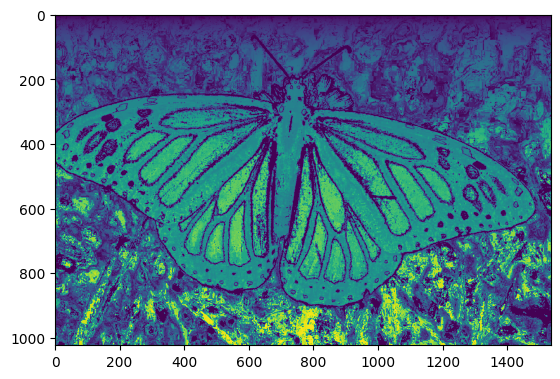

In [53]:
plt.imshow(L)

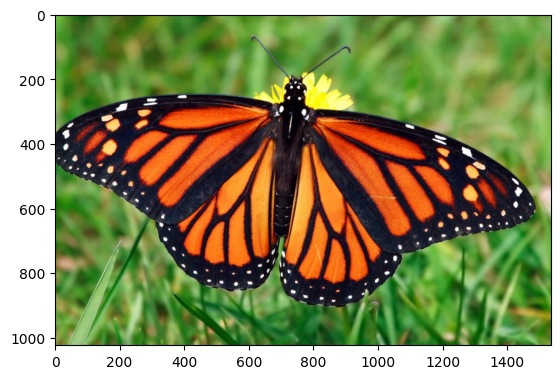

In [54]:
plt.imshow(I)

The DBSCAN algorithm has done very well on identifying the clusters within the image, however, we see that we have a lot of clusters. As a human we don't see this many clusters. This might be a sign that we need to play more with the algorithm and its hyperparameters to obtain a more realistic clustering. 

To optimize these parameters we need to find the optimum number of points to form a cluster and the radius Epsilon around each point that we want to look for other points.

## Sources
[DBSCAN, a density-based algorithm for discovering clusters](https://cdn.aaai.org/KDD/1996/KDD96-037.pdf?source=post_page---------------------------)

[Video : Clustering with DBSCAN, clearly explained](https://youtu.be/RDZUdRSDOok?si=CPiHvumMMTC0OkmW)